In [1]:
import numpy as np
import math

import sys
sys.path.insert(0, "../")

from dense2DkernelCNN import dense2DkernelCNN 
from denseCNN import denseCNN 

In [15]:
m = denseCNN()
m.setpams({'CNN_pool':[True],'shape': (4, 4, 3)})
m.init()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4, 4, 3)]         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 8)           224       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
encoded_vector (Dense)       (None, 12)                396       
Total params: 620
Trainable params: 620
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape   

In [3]:
m = dense2DkernelCNN()
m.setpams({'encoded_dim':16,'share_filters':False})
m.init()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 4, 3)]    0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4, 4, 1)      0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 4, 4, 1)      0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 4, 4, 1)      0           input_1[0][0]                    
____________________________________________________________________________________________

In [ ]:
m_autoCNN, m_autoCNNen = m.get_models()

In [ ]:
m_autoCNN.layers[2].input

In [ ]:
m_decoder = Model(inputs = m_autoCNN.layers[2].input,
                 outputs = m_autoCNN.layers[2].output)

In [ ]:
m_autoCNNen.summary()

In [ ]:
m_decoder.summary()

In [ ]:
m_autoCNNen.summary()

In [2]:
edim = 16
arrange443 = np.array([0,16, 32,
                       1,17, 33,
                       2,18, 34,
                       3,19, 35,
                       4,20, 36,
                       5,21, 37,
                       6,22, 38,
                       7,23, 39,
                       8,24, 40,
                       9,25, 41,
                       10,26, 42,
                       11,27, 43,
                       12,28, 44,
                       13,29, 45,
                       14,30, 46,
                       15,31, 47])
nBits_encod_total = 7
model_config =  {
        'name': "Aug14_qKeras_optA", 'ws': '', # custom
        'pams': {'shape': (4, 4, 3),    
                 'CNN_pool':[1],
                 'channels_first': False,                                                                                             
                 'arrange': arrange443,
                 'encoded_dim': edim,                                                                                                 
                 'loss': 'telescopeMSE',                                                                                              
                 'nBits_encod'  : {'total':  nBits_encod_total, 'integer': 1,'keep_negative':0},                                      
                 'nBits_input'  : {'total': 10,                 'integer': 3,'keep_negative':1},                                      
                 'nBits_accum'  : {'total': 11,                 'integer': 3,'keep_negative':1},                                      
                 'nBits_weight' : {'total':  5,                 'integer': 1,'keep_negative':1},                                      
             },
         'isQK':False,
        }
m = dense2DkernelCNN()
m.setpams(model_config['pams'])
m.init(False)
m_autoCNN, m_autoCNNen = m.get_models()

print('------------\ntotal model\n------------')
print(m_autoCNN.summary())
print('------------\nencoder\n------------')
print(m_autoCNNen.summary())
print('------------\ndecoder\n------------')
print(m_autoCNN.layers[2].summary())

TypeError: Input 'b' of 'MatMul' Op has type float32 that does not match type float64 of argument 'a'.

In [5]:
f_raw = '../SampleSplitting_SignalAllocation/nElinks_5/ttbar_v11_eolNoise_Layer9_5Links.csv'
calQ     = np.genfromtxt(f_raw, delimiter=',',usecols=[*range(0, 48)],skip_header=2000,max_rows=10000)
sumQ     = calQ.sum(axis=1)
calQ     = calQ[sumQ>0]
sumQ     = sumQ[sumQ>0]

inputQf_48_arr   = np.array([calQ[i]/s for i,s in enumerate(sumQ)])[:,arrange443]  
inputQf_443_arr  = inputQf_48_arr.reshape(len(inputQf_48_arr),4,4,3)
inputQ_48_arr    = np.array([inputQf_48_arr[i]*s for i,s in enumerate(sumQ)])              
inputQ_443_arr   =  inputQ_48_arr.reshape(len(inputQ_48_arr),4,4,3) 

In [6]:
history = m_autoCNN.fit(inputQf_443_arr,
                        inputQf_443_arr,
                        epochs = 10)

Train on 8932 samples
Epoch 1/10
8932/8932 [==============================] - 2s 231us/sample - loss: 0.0252
Epoch 2/10
8932/8932 [==============================] - 1s 92us/sample - loss: 0.0074
Epoch 3/10
8932/8932 [==============================] - 1s 88us/sample - loss: 0.0069
Epoch 4/10
8932/8932 [==============================] - 1s 86us/sample - loss: 0.0058
Epoch 5/10
8932/8932 [==============================] - 1s 87us/sample - loss: 0.0040
Epoch 6/10
8932/8932 [==============================] - 1s 85us/sample - loss: 0.0024
Epoch 7/10
8932/8932 [==============================] - 1s 88us/sample - loss: 0.0015
Epoch 8/10
8932/8932 [==============================] - 1s 90us/sample - loss: 0.0011
Epoch 9/10
8932/8932 [==============================] - 1s 87us/sample - loss: 9.0786e-04
Epoch 10/10
8932/8932 [==============================] - 1s 85us/sample - loss: 7.9055e-04


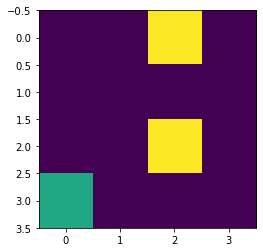

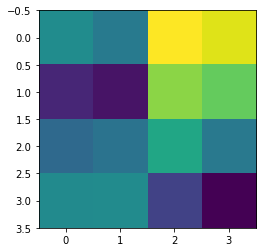

In [6]:
# # check loss
import matplotlib.pyplot as plt
# plt.figure()
# plt.plot(history.history['loss'])
# plt.show()

# check agreement with one sample:
plt.figure()
plt.imshow(inputQf_443_arr[0,:,:,0])
plt.figure()
plt.imshow(m_autoCNN(inputQf_443_arr[0:1])[0,:,:,0])